In [1]:
# Let´s prototype a model to predict stock prices

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
import yfinance as yf
import plotly.express as px
from plotly.subplots import make_subplots

In [3]:
# S&P500 --> '^GSPC'   
#sp500_assets = ['^GSPC', 'IBM', 'MGM', 'T', 'BA', 'GOOG', 'AAPL', 'TSLA', 'MSFT', 'FB']

# top 40 dax companies 
dax_assets = {
               'DAX': '^GDAXI',
               'Linde': 'LIN',
               'SAP': 'SAP',
               'Deutsche Telekom': 'DTE.DE',
               'Volkswagen': 'VOW3.DE',
               'Siemens': 'SIE.DE',
               'Merck': 'MRK.DE',
               'Airbus': 'AIR.PA',
               'Mercedes Benz': 'MBG.DE', 
               'Bayer': 'BAYZF',
               'BMW': 'BMW.DE',
               'Siemens Healthineers': 'SHL.DE',
               'Deutsche Post': 'DPW.DE',
               'BASF': 'BAS.DE',
               'Münchner Rück': 'MUV2.DE',
               'Infineon': 'IFX.DE',
               'Deutsche Börse': 'DB1:DE',
               'RWE': 'RWE.DE',
               'Henkel': 'HEN3.DE',
               'Adidas': 'ADS.DE',
               'Sartorius': 'SRT.DE',
               'Beiersdorf': 'BEI.DE',
               'Porsche': 'PAH3.DE',
               'E.ON': 'EOAN.DE',
               'Deutsche Bank': 'DB',
               'Vonovia': 'VNA.DE',
               'Fresenius': 'FRE.DE',
               'Symrise': 'SY1.DE',
               'Continental': 'CON.DE',
               'Delivery Hero': 'DHER.F',
               'Brenntag': 'BNR.DE',
               'Qiagen': 'QGEN',
               'Fresenius Medical Care': 'FMS',
               'Siemens Energy': 'ENR.F',
               'HeidelbergCement': 'HEI.DE',
               'Puma': 'PUM.DE',
               'MTU Aero Engines': 'MTX.DE',
               'Covestro': '1COV.F',
               'Zalando': 'ZAL.DE',
               'HelloFresh': 'HFG.DE'
            }

# top 10 dax companies 
dax_assets = {
               'DAX': '^GDAXI',
               'Linde': 'LIN',
               'SAP': 'SAP',
               'Deutsche Telekom': 'DTE.DE',
               'Volkswagen': 'VOW3.DE',
               'Siemens': 'SIE.DE',
               'Merck': 'MRK.DE',
               'Airbus': 'AIR.PA',
               'Mercedes Benz': 'MBG.DE', 
               'Bayer': 'BAYZF'
            }

# top 5 dax companies 
dax_assets = {
               'Linde': 'LIN',
               'SAP': 'SAP',
               'Deutsche Telekom': 'DTE.DE',
               'Volkswagen': 'VOW3.DE',
               'Siemens': 'SIE.DE',
            }

In [4]:
stock_name = 'Linde'
ticker = yf.Ticker(dax_assets[stock_name]) 

#df = ticker.history(period="max",
#                    back_adjust=True)
df = ticker.history(start='2019-01-01', 
                    end='2019-12-31', 
                    back_adjust=True)

df.head()

Open        High         Low       Close   Volume  \
Date                                                                  
2018-12-31  146.820848  147.544477  144.668772  146.642288  1853900   
2019-01-02  144.283439  148.634596  144.274047  147.732407  1716400   
2019-01-03  144.781552  145.054095  142.779830  143.118149  1775500   
2019-01-04  144.565423  148.127160  144.123728  147.196793  1801300   
2019-01-07  146.397925  148.521808  145.805863  147.065170  1830200   

            Dividends  Stock Splits  
Date                                 
2018-12-31        0.0             0  
2019-01-02        0.0             0  
2019-01-03        0.0             0  
2019-01-04        0.0             0  
2019-01-07        0.0             0

In [5]:
fig = px.line(df, y="Close", title=stock_name)
fig.show()

In [6]:
#ticker.info

# Get all stock data from top DAX companies

In [7]:
dax_top_40_companies = list(dax_assets.keys())#[1:]
dax_top_40_tickername = list(dax_assets.values())#[1:]

In [8]:
start_date = '2019-01-01'
end_date = '2022-09-15'
na_percentage = 0.6 # at least x percent rows must be none-nas

# download DAX top40
df = yf.download(dax_top_40_tickername, 
                    start=start_date, 
                    end=end_date,
                    progress=True)
# drop columns
df = df['Close']
# rename columns
df.columns = dax_top_40_companies
# make sure the index is datetime format
df.index = pd.to_datetime(df.index)
# drop nas
datetimeFormat = '%Y-%m-%d'
time_delta = datetime.strptime(end_date, datetimeFormat) - datetime.strptime(start_date,datetimeFormat)
df.dropna(axis=1, thresh=int(time_delta.days * na_percentage), inplace=True)
# show data
df.head()

[*********************100%***********************]  40 of 40 completed

1 Failed download:
- DB1:DE: No data found, symbol may be delisted


DAX       Linde        SAP  Deutsche Telekom  Volkswagen  \
Date                                                                         
2018-12-31        NaN         NaN        NaN               NaN   69.500000   
2019-01-02  42.900002  184.399994  84.169998         60.720001   69.599998   
2019-01-03  42.939999  183.949997  81.209999         60.020000   71.510002   
2019-01-04  45.549999  191.050003  85.120003         63.189999   73.750000   
2019-01-07  45.150002  189.699997  83.559998         62.900002   74.699997   

              Siemens      Merck     Airbus  Mercedes Benz  Bayer  ...  \
Date                                                               ...   
2018-12-31        NaN        NaN        NaN            NaN   8.15  ...   
2019-01-02  91.860001  69.739998  38.259998     120.599998   8.20  ...   
2019-01-03  91.360001  69.050003  36.630001     121.400002   8.09  ...   
2019-01-04  92.180000  71.709999  38.599998     126.000000   8.52  ...   
2019-01-07  91.279999  72.120003  38.450001     126.400002   8.70  ...   

             Brenntag     Qiagen  Fresenius Medical Care  Siemens Energy  \
Date                                                                       
2018-12-31        NaN  99.550003                     NaN             NaN   
2019-01-02  19.299999  99.180000               36.810001       98.080002   
2019-01-03  19.525000  95.459999               35.700001       95.449997   
2019-01-04  19.924999  98.739998               36.669998       99.190002   
2019-01-07  19.900000  99.709999               36.224998       97.889999   

            HeidelbergCement       Puma  MTU Aero Engines    Covestro  \
Date                                                                    
2018-12-31               NaN        NaN               NaN         NaN   
2019-01-02         96.000000  66.120003         39.889999  136.259995   
2019-01-03         92.599998  64.459999         40.000000  134.759995   
2019-01-04         95.400002  66.540001         40.400002  140.479996   
2019-01-07         99.199997  66.620003         40.580002  140.639999   

              Zalando    HelloFresh  
Date                                 
2018-12-31        NaN           NaN  
2019-01-02  22.959999  10580.190430  
2019-01-03  23.969999  10416.660156  
2019-01-04  24.760000  10767.690430  
2019-01-07  26.200001  10747.809570  

[5 rows x 38 columns]

# Fill NA Values

In [9]:
# check if any NAs 
df.isna().sum()

DAX                       19
Linde                     19
SAP                        8
Deutsche Telekom          19
Volkswagen                26
Siemens                   19
Merck                     19
Airbus                    19
Mercedes Benz             19
Bayer                     26
Siemens Healthineers      19
Deutsche Post             19
BASF                      19
Infineon                  19
Deutsche Börse            26
RWE                       19
Henkel                    19
Adidas                    19
Sartorius                 19
Beiersdorf                19
Porsche                   26
E.ON                      19
Deutsche Bank             19
Vonovia                   19
Fresenius                 19
Symrise                   19
Continental               19
Delivery Hero             26
Brenntag                  19
Qiagen                    26
Fresenius Medical Care    19
Siemens Energy            19
HeidelbergCement          19
Puma                      19
MTU Aero Engin

In [10]:
df.dtypes

DAX                       float64
Linde                     float64
SAP                       float64
Deutsche Telekom          float64
Volkswagen                float64
Siemens                   float64
Merck                     float64
Airbus                    float64
Mercedes Benz             float64
Bayer                     float64
Siemens Healthineers      float64
Deutsche Post             float64
BASF                      float64
Infineon                  float64
Deutsche Börse            float64
RWE                       float64
Henkel                    float64
Adidas                    float64
Sartorius                 float64
Beiersdorf                float64
Porsche                   float64
E.ON                      float64
Deutsche Bank             float64
Vonovia                   float64
Fresenius                 float64
Symrise                   float64
Continental               float64
Delivery Hero             float64
Brenntag                  float64
Qiagen        

In [11]:
df = df.interpolate(method='time', limit=7).fillna(value=None, method='bfill', axis=0, inplace=False, limit=7, downcast=None)

In [12]:
df

DAX       Linde        SAP  Deutsche Telekom  Volkswagen  \
Date                                                                         
2018-12-31  42.900002  184.399994  84.169998         60.720001   69.500000   
2019-01-02  42.900002  184.399994  84.169998         60.720001   69.599998   
2019-01-03  42.939999  183.949997  81.209999         60.020000   71.510002   
2019-01-04  45.549999  191.050003  85.120003         63.189999   73.750000   
2019-01-07  45.150002  189.699997  83.559998         62.900002   74.699997   
...               ...         ...        ...               ...         ...   
2022-09-08  30.840000  142.360001  96.279999         42.494999   51.529999   
2022-09-09  31.780001  145.360001  96.000000         43.485001   53.340000   
2022-09-12  32.450001  149.220001  99.690002         44.919998   54.880001   
2022-09-13  31.450001  142.899994  97.500000         44.209999   53.580002   
2022-09-14  30.580000  142.300003  95.480003         42.770000   53.669998   

               Siemens      Merck     Airbus  Mercedes Benz  Bayer  ...  \
Date                                                                ...   
2018-12-31   91.860001  69.739998  38.259998     120.599998   8.15  ...   
2019-01-02   91.860001  69.739998  38.259998     120.599998   8.20  ...   
2019-01-03   91.360001  69.050003  36.630001     121.400002   8.09  ...   
2019-01-04   92.180000  71.709999  38.599998     126.000000   8.52  ...   
2019-01-07   91.279999  72.120003  38.450001     126.400002   8.70  ...   
...                ...        ...        ...            ...    ...  ...   
2022-09-08  100.500000  72.949997  66.540001      55.759998   8.71  ...   
2022-09-09  102.300003  73.510002  67.879997      57.360001   8.96  ...   
2022-09-12  104.949997  75.779999  70.260002      59.220001   9.31  ...   
2022-09-13  104.199997  74.860001  69.379997      57.000000   8.98  ...   
2022-09-14  103.800003  74.650002  68.519997      56.299999   8.97  ...   

             Brenntag     Qiagen  Fresenius Medical Care  Siemens Energy  \
Date                                                                       
2018-12-31  19.299999  99.550003               36.810001       98.080002   
2019-01-02  19.299999  99.180000               36.810001       98.080002   
2019-01-03  19.525000  95.459999               35.700001       95.449997   
2019-01-04  19.924999  98.739998               36.669998       99.190002   
2019-01-07  19.900000  99.709999               36.224998       97.889999   
...               ...        ...                     ...             ...   
2022-09-08  41.220001  85.309998               49.480000      103.120003   
2022-09-09  41.500000  87.070000               49.860001      105.000000   
2022-09-12  41.610001  88.949997               50.000000      107.580002   
2022-09-13  42.810001  85.860001               48.080002      104.559998   
2022-09-14  41.459999  86.309998               47.259998      102.720001   

            HeidelbergCement        Puma  MTU Aero Engines    Covestro  \
Date                                                                     
2018-12-31         96.000000   66.120003         39.889999  136.259995   
2019-01-02         96.000000   66.120003         39.889999  136.259995   
2019-01-03         92.599998   64.459999         40.000000  134.759995   
2019-01-04         95.400002   66.540001         40.400002  140.479996   
2019-01-07         99.199997   66.620003         40.580002  140.639999   
...                      ...         ...               ...         ...   
2022-09-08        389.000000  103.699997         25.719999  146.119995   
2022-09-09        395.500000  105.050003         26.110001  146.979996   
2022-09-12        397.500000  106.500000         26.719999  152.000000   
2022-09-13        382.500000  103.500000         25.389999  148.720001   
2022-09-14        380.000000  101.400002         24.600000  150.339996   

              Zalando    HelloFresh  
Date                                 

In [13]:
# check if any NAs left
df.isna().sum()

DAX                       0
Linde                     0
SAP                       0
Deutsche Telekom          0
Volkswagen                0
Siemens                   0
Merck                     0
Airbus                    0
Mercedes Benz             0
Bayer                     0
Siemens Healthineers      0
Deutsche Post             0
BASF                      0
Infineon                  0
Deutsche Börse            0
RWE                       0
Henkel                    0
Adidas                    0
Sartorius                 0
Beiersdorf                0
Porsche                   0
E.ON                      0
Deutsche Bank             0
Vonovia                   0
Fresenius                 0
Symrise                   0
Continental               0
Delivery Hero             0
Brenntag                  0
Qiagen                    0
Fresenius Medical Care    0
Siemens Energy            0
HeidelbergCement          0
Puma                      0
MTU Aero Engines          0
Covestro            

# Build Random Portfolio

In [14]:
def normalize_stocks(df:pd.DataFrame)->pd.DataFrame:
    """Normalize stock prices i.e. start with value 1. Input df with only stocks as columns """
    data = df.copy()
    for stock in data:
        data[stock] = data[stock] / data[stock][0]
    return data 

def make_stock_weights(n:int, seed:int)->np.array:
    """Generate random normalized weights for n stocks. If the seed is set to zero, then then there is no seed"""
    if seed == 0:
        # generate n random numbers
        weights = np.array((np.random.random(n)))
    else:
        np.random.seed(seed)
        # generate n random numbers
        weights = np.array((np.random.random(n)))
    return weights/np.sum(weights)

# multiply the actual stock values with the corresponding weight and the initial portfolio value
def stock_weight_product(df:pd.DataFrame, weights:np.array, init_value:int)->pd.DataFrame:
    """Multiply weights, stocks and initial portfolio value"""
    data = df.copy()
    for counter, stock in enumerate(data):
        data[stock] = data[stock] * weights[counter] * init_value
    return data

def calc_portfolio_worth(df:pd.DataFrame)->pd.DataFrame:
    """Add column with the daily portfolio worth"""
    data = df.copy()
    data['portfolio_worth'] = data.sum(axis=1)
    return data

def calc_portfolio_daily_return(df:pd.DataFrame)->pd.DataFrame:
    """Add column with daily portfolio daily return i.e. daily worth percent change """
    data = df.copy()
    data['portfolio_daily_return'] = data['portfolio_worth'].pct_change(periods=1, fill_method='pad', limit=7) * 100
    data['portfolio_daily_return'][0] = 0 # start with zero pct change
    return data

In [15]:
# Initial Portfolio Parameters
initial_portfolio_value = 10000
seed = 123
number_stocks = df.shape[1]

In [16]:
# normalize stock data
df = normalize_stocks(df)

In [17]:
# generate random weights
weights = make_stock_weights(n=number_stocks, seed=seed)
weights

array([0.03773372, 0.01550263, 0.01229049, 0.02986946, 0.03897981,
       0.02292331, 0.05313642, 0.03710311, 0.02605621, 0.02124437,
       0.0185929 , 0.03949889, 0.02376123, 0.00323326, 0.02156548,
       0.03998355, 0.00988714, 0.00950573, 0.0287987 , 0.02881367,
       0.03437095, 0.04602102, 0.03924997, 0.03310439, 0.03914096,
       0.01749746, 0.0196012 , 0.01236698, 0.01591301, 0.0341854 ,
       0.00499012, 0.02349732, 0.02334354, 0.02674716, 0.02307088,
       0.01691787, 0.02309911, 0.04840257])

In [18]:
# multiply weights with stock values and multiply with initial portfolio value
df = stock_weight_product(df, weights, initial_portfolio_value)
df.head()

DAX       Linde         SAP  Deutsche Telekom  Volkswagen  \
Date                                                                           
2018-12-31  377.337187  155.026258  122.904920        298.694571  389.798146   
2019-01-02  377.337187  155.026258  122.904920        298.694571  390.358998   
2019-01-03  377.688992  154.647943  118.582733        295.251118  401.071457   
2019-01-04  400.645874  160.616964  124.292115        310.845012  413.634724   
2019-01-07  397.127599  159.482005  122.014198        309.418455  418.962883   

               Siemens       Merck      Airbus  Mercedes Benz       Bayer  \
Date                                                                        
2018-12-31  229.233116  531.364218  371.031099     260.562125  212.443744   
2019-01-02  229.233116  531.364218  371.031099     260.562125  213.747085   
2019-01-03  227.985385  526.106997  355.223998     262.290570  210.879755   
2019-01-04  230.031663  546.374086  374.328293     272.229089  222.088452   
2019-01-07  227.785744  549.497993  372.873671     273.093312  226.780444   

            ...    Brenntag      Qiagen  Fresenius Medical Care  \
Date        ...                                                   
2018-12-31  ...  159.130130  341.853970               49.901158   
2019-01-02  ...  159.130130  340.583383               49.901158   
2019-01-03  ...  160.985277  327.808927               48.396395   
2019-01-04  ...  164.283308  339.072418               49.711364   
2019-01-07  ...  164.077184  342.403395               49.108104   

            Siemens Energy  HeidelbergCement        Puma  MTU Aero Engines  \
Date                                                                         
2018-12-31      234.973182        233.435372  267.471627        230.708849   
2019-01-02      234.973182        233.435372  267.471627        230.708849   
2019-01-03      228.672401        225.167865  260.756505        231.345051   
2019-01-04      237.632444        231.976404  269.170623        233.658511   
2019-01-07      234.517987        241.216543  269.494250        234.699565   

              Covestro     Zalando  HelloFresh  
Date                                            
2018-12-31  169.178729  230.991128  484.025656  
2019-01-02  169.178729  230.991128  484.025656  
2019-01-03  167.316348  241.152326  476.544425  
2019-01-04  174.418231  249.100201  492.603461  
2019-01-07  174.616889  263.587456  491.693945  

[5 rows x 38 columns]

In [19]:
# calculate the daily worth of the portfolio
df = calc_portfolio_worth(df)

In [20]:
# calculate the percent change of the daily worth of the portfolio
df = calc_portfolio_daily_return(df)

In [21]:
df

DAX       Linde         SAP  Deutsche Telekom  Volkswagen  \
Date                                                                           
2018-12-31  377.337187  155.026258  122.904920        298.694571  389.798146   
2019-01-02  377.337187  155.026258  122.904920        298.694571  390.358998   
2019-01-03  377.688992  154.647943  118.582733        295.251118  401.071457   
2019-01-04  400.645874  160.616964  124.292115        310.845012  413.634724   
2019-01-07  397.127599  159.482005  122.014198        309.418455  418.962883   
...                ...         ...         ...               ...         ...   
2022-09-08  271.260571  119.682966  140.587927        209.041917  289.011482   
2022-09-09  279.528570  122.205085  140.179073        213.911945  299.163067   
2022-09-12  285.421715  125.450213  145.567210        220.971003  307.800326   
2022-09-13  276.625977  120.136942  142.369371        217.478367  300.509142   
2022-09-14  268.973677  119.632526  139.419774        210.394708  301.013896   

               Siemens       Merck      Airbus  Mercedes Benz       Bayer  \
Date                                                                        
2018-12-31  229.233116  531.364218  371.031099     260.562125  212.443744   
2019-01-02  229.233116  531.364218  371.031099     260.562125  213.747085   
2019-01-03  227.985385  526.106997  355.223998     262.290570  210.879755   
2019-01-04  230.031663  546.374086  374.328293     272.229089  222.088452   
2019-01-07  227.785744  549.497993  372.873671     273.093312  226.780444   
...                ...         ...         ...            ...         ...   
2022-09-08  250.793904  555.821900  645.279947     120.472171  227.041117   
2022-09-09  255.285743  560.088701  658.274728     123.929053  233.557797   
2022-09-12  261.898701  577.384299  681.355122     127.947675  242.681158   
2022-09-13  260.027105  570.374633  672.821165     123.151255  234.079118   
2022-09-14  259.028935  568.774604  664.481202     121.638869  233.818470   

            ...  Fresenius Medical Care  Siemens Energy  HeidelbergCement  \
Date        ...                                                             
2018-12-31  ...               49.901158      234.973182        233.435372   
2019-01-02  ...               49.901158      234.973182        233.435372   
2019-01-03  ...               48.396395      228.672401        225.167865   
2019-01-04  ...               49.711364      237.632444        231.976404   
2019-01-07  ...               49.108104      234.517987        241.216543   
...         ...                     ...             ...               ...   
2022-09-08  ...               67.077131      247.047662        945.899580   
2022-09-09  ...               67.592276      251.551628        961.705100   
2022-09-12  ...               67.782065      257.732615        966.568336   
2022-09-13  ...               65.179236      250.497501        930.094060   
2022-09-14  ...               64.067606      246.089367        924.015013   

                  Puma  MTU Aero Engines    Covestro     Zalando  HelloFresh  \
Date                                                                           
2018-12-31  267.471627        230.708849  169.178729  230.991128  484.025656   
2019-01-02  267.471627        230.708849  169.178729  230.991128  484.025656   
2019-01-03  260.756505        231.345051  167.316348  241.152326  476.544425   
2019-01-04  269.170623        233.658511  174.418231  249.100201  492.603461   
2019-01-07  269.494250        234.699565  174.616889  263.587456  491.693945   
...                ...               ...         ...         ...         ...   
2022-09-08  419.491920        148.754864  181.420784  224.049335  590.350631   
2022-09-09  424.953026        151.010486  182.488550  231.091737  598.763269   
2022-09-12  430.818619        154.538490  188.721326  242.762019  613.130958   
2022-09-13  418.682883        146.846268  184.648920  222.540251  603.371963   
2022-09-14  41

# Let´s automate the workflow

In [22]:
start_date = '2016-01-01'
end_date = '2022-09-15'
na_percentage = 0.6 # at least x percent rows must be none-nas

# download DAX top40
df = yf.download(dax_top_40_tickername, 
                start=start_date, 
                end=end_date,
                progress=True)
# drop columns
df = df['Close']
# rename columns
df.columns = dax_top_40_companies
# make sure the index is datetime format
df.index = pd.to_datetime(df.index)
# drop ncolumns with too much missing data
datetimeFormat = '%Y-%m-%d'
time_delta = datetime.strptime(end_date, datetimeFormat) - datetime.strptime(start_date,datetimeFormat)
df.dropna(axis=1, thresh=int(time_delta.days * na_percentage), inplace=True)
# interpolate the time series
df = df.interpolate(method='time', limit=7).fillna(value=None, method='bfill', axis=0, inplace=False, limit=7, downcast=None)
# show data
df.head()

[*********************100%***********************]  40 of 40 completed

1 Failed download:
- DB1:DE: No data found, symbol may be delisted


DAX      Linde        SAP  Deutsche Telekom  Volkswagen  \
Date                                                                        
2015-12-31  32.765999  87.540001  60.860001         67.580002  125.500000   
2016-01-04  32.765999  87.540001  60.860001         67.580002  121.000000   
2016-01-05  32.153000  87.239998  62.090000         67.199997  119.629997   
2016-01-06  31.875999  86.230003  61.270000         66.080002  119.629997   
2016-01-07  29.990999  84.889999  60.040001         64.470001  116.449997   

              Siemens      Merck     Airbus  Mercedes Benz      Bayer  ...  \
Date                                                                   ...   
2015-12-31  81.120003  92.250000  47.924999     215.300003  24.150000  ...   
2016-01-04  81.120003  92.250000  47.924999     215.300003  23.490000  ...   
2016-01-05  82.000000  91.820000  48.220001     216.649994  23.480000  ...   
2016-01-06  81.470001  88.779999  47.650002     209.800003  23.139999  ...   
2016-01-07  79.480003  85.440002  46.430000     204.699997  22.719999  ...   

            Delivery Hero  Brenntag     Qiagen  Siemens Energy  \
Date                                                             
2015-12-31      28.742205    10.880  79.099998       85.529999   
2016-01-04      27.765074    10.880  77.139999       85.529999   
2016-01-05      27.754679    11.110  76.970001       86.070000   
2016-01-06      27.557173    11.165  77.650002       85.730003   
2016-01-07      26.912682    10.860  77.209999       84.089996   

            HeidelbergCement       Puma  MTU Aero Engines    Covestro  \
Date                                                                    
2015-12-31         87.250000  60.189999         27.605000  126.400002   
2016-01-04         87.250000  60.189999         27.605000  126.400002   
2016-01-05         86.925003  59.610001         27.790001  121.400002   
2016-01-06         85.000000  59.049999         27.215000  118.900002   
2016-01-07         73.474998  57.980000         26.705000  115.000000   

              Zalando    HelloFresh  
Date                                 
2015-12-31  35.084999  10283.440430  
2016-01-04  35.084999  10283.440430  
2016-01-05  33.630001  10310.099609  
2016-01-06  33.650002  10214.019531  
2016-01-07  32.990002   9979.849609  

[5 rows x 35 columns]

In [23]:
df

DAX       Linde        SAP  Deutsche Telekom  Volkswagen  \
Date                                                                         
2015-12-31  32.765999   87.540001  60.860001         67.580002  125.500000   
2016-01-04  32.765999   87.540001  60.860001         67.580002  121.000000   
2016-01-05  32.153000   87.239998  62.090000         67.199997  119.629997   
2016-01-06  31.875999   86.230003  61.270000         66.080002  119.629997   
2016-01-07  29.990999   84.889999  60.040001         64.470001  116.449997   
...               ...         ...        ...               ...         ...   
2022-09-08  30.840000  142.360001  96.279999         42.494999   51.529999   
2022-09-09  31.780001  145.360001  96.000000         43.485001   53.340000   
2022-09-12  32.450001  149.220001  99.690002         44.919998   54.880001   
2022-09-13  31.450001  142.899994  97.500000         44.209999   53.580002   
2022-09-14  30.580000  142.300003  95.480003         42.770000   53.669998   

               Siemens      Merck     Airbus  Mercedes Benz      Bayer  ...  \
Date                                                                    ...   
2015-12-31   81.120003  92.250000  47.924999     215.300003  24.150000  ...   
2016-01-04   81.120003  92.250000  47.924999     215.300003  23.490000  ...   
2016-01-05   82.000000  91.820000  48.220001     216.649994  23.480000  ...   
2016-01-06   81.470001  88.779999  47.650002     209.800003  23.139999  ...   
2016-01-07   79.480003  85.440002  46.430000     204.699997  22.719999  ...   
...                ...        ...        ...            ...        ...  ...   
2022-09-08  100.500000  72.949997  66.540001      55.759998   8.710000  ...   
2022-09-09  102.300003  73.510002  67.879997      57.360001   8.960000  ...   
2022-09-12  104.949997  75.779999  70.260002      59.220001   9.310000  ...   
2022-09-13  104.199997  74.860001  69.379997      57.000000   8.980000  ...   
2022-09-14  103.800003  74.650002  68.519997      56.299999   8.970000  ...   

            Delivery Hero   Brenntag     Qiagen  Siemens Energy  \
Date                                                              
2015-12-31      28.742205  10.880000  79.099998       85.529999   
2016-01-04      27.765074  10.880000  77.139999       85.529999   
2016-01-05      27.754679  11.110000  76.970001       86.070000   
2016-01-06      27.557173  11.165000  77.650002       85.730003   
2016-01-07      26.912682  10.860000  77.209999       84.089996   
...                   ...        ...        ...             ...   
2022-09-08      46.070000  41.220001  85.309998      103.120003   
2022-09-09      46.160000  41.500000  87.070000      105.000000   
2022-09-12      46.580002  41.610001  88.949997      107.580002   
2022-09-13      45.299999  42.810001  85.860001      104.559998   
2022-09-14      44.970001  41.459999  86.309998      102.720001   

            HeidelbergCement        Puma  MTU Aero Engines    Covestro  \
Date                                                                     
2015-12-31         87.250000   60.189999         27.605000  126.400002   
2016-01-04         87.250000   60.189999         27.605000  126.400002   
2016-01-05         86.925003   59.610001         27.790001  121.400002   
2016-01-06         85.000000   59.049999         27.215000  118.900002   
2016-01-07         73.474998   57.980000         26.705000  115.000000   
...                      ...         ...               ...         ...   
2022-09-08        389.000000  103.699997         25.719999  146.119995   
2022-09-09        395.500000  105.050003         26.110001  146.979996   
2022-09-12        397.500000  106.500000         26.719999  152.000000   
2022-09-13        382.500000  103.500000         25.389999  148.720001   
2022-09-14        380.000000  101.400002         24.600000  150.339996   

              Zalando    HelloFresh  
Date                                 
2015-12-31  35.084999  10283.440430  
2016-01-04  35.084999  102

In [24]:
def portfolio_allocation(df:pd.DataFrame, weights:np.array, init_value:int)->pd.DataFrame:
    """Take stock dataframe and calculate the daily portfolio worth and the daily returns in percent given the stock weights"""
    data = df.copy()
    # normalize stock data
    data = normalize_stocks(data)
    # multiply weights with stock values and multiply with initial portfolio value
    data = stock_weight_product(data, weights, init_value)
    # calculate the daily worth of the portfolio
    data = calc_portfolio_worth(data)
    # calculate the percent change of the daily worth of the portfolio
    data = calc_portfolio_daily_return(data)
    return data

def add_cumulative_return(df:pd.DataFrame)->pd.DataFrame:
    """Add column with cumulative return in percent i.e. the percentage difference of the portfolio worth normalized to the initial_portfolio_value. 
    The dataframe df must contain a column called 'portfolio_worth' """
    data = df.copy()
    initial_portfolio_value = data['portfolio_worth'][0]
    data['portfolio_cumulative_return'] = 100* (data['portfolio_worth'] - initial_portfolio_value) / initial_portfolio_value
    return data

def calc_portfolio_mean_return(df:pd.DataFrame)->float:
    """Calculate the average daily return for a given portfolio. 
    The input dataframe must contain a column called 'portfolio_daily_return' """
    portfolio_mean_return = df['portfolio_daily_return'].mean()
    return portfolio_mean_return

def calc_portfolio_risk(df:pd.DataFrame)->float:
    """Calculate the risk for a given portfolio; the risk is measured by the portfolios standard deviation. 
    The input dataframe must contain a column called 'portfolio_daily_return' """
    portfolio_risk = df['portfolio_daily_return'].std()
    return portfolio_risk     

def calc_sharp_ratio(df:pd.DataFrame, rrf:float)->float:
    """Calculate the sharp ratio for a given portfolio df and a given risk-free-return rrf.
    Provide rrf in percentage per year! The input dataframe must contain a column called 'portfolio_daily_return' """
    ntd = 252 #  number of trading days
    sharp_ratio = (df['portfolio_daily_return'].mean() - rrf/ntd) / df['portfolio_daily_return'].std() * np.sqrt(ntd)
    return sharp_ratio

In [25]:
# Initial Portfolio Parameters
initial_portfolio_value = 10000
seed = 123
number_stocks = df.shape[1]

In [26]:
# generate random weights
weights = make_stock_weights(n=number_stocks, seed=seed)
weights

array([0.04139373, 0.01700632, 0.01348262, 0.03276667, 0.0427607 ,
       0.02514678, 0.05829044, 0.04070196, 0.02858356, 0.02330499,
       0.02039634, 0.04333011, 0.02606597, 0.00354688, 0.02365724,
       0.04386179, 0.01084616, 0.01042775, 0.03159206, 0.03160848,
       0.03770479, 0.05048487, 0.04305705, 0.03631538, 0.04293748,
       0.01919464, 0.02150244, 0.01356653, 0.01745651, 0.03750124,
       0.00547414, 0.02577646, 0.02560776, 0.02934153, 0.02530867])

In [27]:
# calculate the portfolio allocation
df_allocation = portfolio_allocation(df, weights, initial_portfolio_value)

In [28]:
# add cumulative return
df_allocation = add_cumulative_return(df_allocation)

In [29]:
df_allocation

DAX       Linde         SAP  Deutsche Telekom  Volkswagen  \
Date                                                                           
2015-12-31  413.937341  170.063167  134.826191        327.666715  427.606962   
2016-01-04  413.937341  170.063167  134.826191        327.666715  412.274442   
2016-01-05  406.193242  169.480354  137.551070        325.824232  407.606531   
2016-01-06  402.693858  167.518247  135.734484        320.393852  407.606531   
2016-01-07  378.880392  164.915033  133.009605        312.587643  396.771549   
...                ...         ...         ...               ...         ...   
2022-09-08  389.605937  276.561484  213.293878        206.040194  175.574392   
2022-09-09  401.481092  282.389557  212.673582        210.840291  181.741477   
2022-09-12  409.945295  289.888345  220.848229        217.797985  186.988610   
2022-09-13  397.312158  277.610524  215.996607        214.355501  182.559218   
2022-09-14  386.321318  276.444928  211.521608        207.373560  182.865856   

               Siemens       Merck      Airbus  Mercedes Benz       Bayer  \
Date                                                                        
2015-12-31  251.467785  582.904360  407.019589     285.835579  233.049913   
2016-01-04  251.467785  582.904360  407.019589     285.835579  226.680848   
2016-01-05  254.195730  580.187297  409.524995     287.627847  226.584345   
2016-01-06  252.552762  560.978302  404.684076     278.533695  223.303310   
2016-01-07  246.383872  539.873712  394.322794     271.762848  219.250267   
...                ...         ...         ...            ...         ...   
2022-09-08  311.544767  460.952534  565.113912      74.027827   84.052372   
2022-09-09  317.124683  464.491065  576.494293      76.152015   86.464897   
2022-09-12  325.339526  478.834598  596.707305      78.621380   89.842436   
2022-09-13  323.014565  473.021363  589.233560      75.674072   86.657894   
2022-09-14  321.774605  471.694432  581.929709      74.744741   86.561400   

            ...  Siemens Energy  HeidelbergCement       Puma  \
Date        ...                                                
2015-12-31  ...      174.565098        375.012398  54.741365   
2016-01-04  ...      174.565098        375.012398  54.741365   
2016-01-05  ...      175.667229        373.615517  54.213871   
2016-01-06  ...      174.973303        365.341591  53.704563   
2016-01-07  ...      171.626080        315.805563  52.731424   
...         ...             ...               ...        ...   
2022-09-08  ...      210.465961       1671.975046  94.312669   
2022-09-09  ...      214.302999       1699.912932  95.540467   
2022-09-12  ...      219.568734       1708.509205  96.859204   
2022-09-13  ...      213.404963       1644.037159  94.130776   
2022-09-14  ...      209.649565       1633.291818  92.220878   

            MTU Aero Engines    Covestro     Zalando  HelloFresh  \
Date                                                               
2015-12-31        257.764613  256.077642  293.415274  253.086658   
2016-01-04        257.764613  256.077642  293.415274  253.086658   
2016-01-05        259.492083  245.947989  281.247149  253.742769   
2016-01-06        254.122953  240.883162  281.414413  251.378134   
2016-01-07        249.360771  232.982029  275.894845  245.614957   
...                      ...         ...         ...         ...   
2022-09-08        240.163224  296.028982  186.243650  317.589363   
2022-09-09        243.804902  297.771284  192.097729  322.115087   
2022-09-12        249.500830  307.941465  201.798789  329.844435   
2022-09-13        237.081814  301.296414  184.989205  324.594414   
2022-09-14        229.705115  304.578412  181.142225  320.633255   

            portfolio_worth  portfolio_daily_return  \
Date                                                  
2015-12-31     10000.000000                0.000000   
2016-01-04      9965.684411               -0.343156   
2016-01-05      9953.383251           

# check allocations for different portfolio weights

In [30]:
seed = 0 # i.e. dont use seed :-)
# generate random weights
weights = make_stock_weights(n=number_stocks, seed=seed)
# calculate the portfolio allocation
df_allocation = portfolio_allocation(df, weights, initial_portfolio_value)
# add cumulative return
df_allocation = add_cumulative_return(df_allocation)
# calculate the sharp ratio
rrf = 0.5
sharp_ratio = calc_sharp_ratio(df_allocation, rrf)
print('The sharp ratio for this fortfolio configuration is: {}'.format(sharp_ratio))

The sharp ratio for this fortfolio configuration is: 0.34037523736297276


In [31]:
# plot daily portfolio worth
fig = px.line(df_allocation, 
              y="portfolio_worth", 
              title='portfolio worth',
              range_y=(initial_portfolio_value/3, initial_portfolio_value*3))
fig.show()

In [32]:
# plot daily returns
fig = px.line(df_allocation, y="portfolio_daily_return", title='Portfolio Daily Returns')
fig.show()

In [33]:
# plot histogram of daily returns
fig = px.histogram(df_allocation, x="portfolio_daily_return", title='Portfolio Daily Returns')
fig.show()

In [34]:
# plot portfolio cumulative return
fig = px.line(df_allocation, 
              y="portfolio_cumulative_return", 
              title='Portfolio Cumulative Return in Percent',
              range_y=(-50, 150))
fig.show()

# Monte Carlo Simulation for Portfolio Optimization

In [35]:
def sim2sharp(portfolio_returns:list, portfolio_risks:list, sharp_ratios:list)->pd.DataFrame:
    """Make dataframe given the portfolios´s returns, risks and sharp ratios.
    Args:
        portfolio_returns (list): return for each monte-carlo simulation
        portfolio_risks (list): standard deviation for each monte-carlo simulation
        sharp_ratios (list): sharp ratio for each monte-carlo simulation
    """
    df_return_risk_sharp = pd.DataFrame(data={'average daily return': portfolio_returns,
                                              'average risk': portfolio_risks, 
                                              'sharp ratio': sharp_ratios
                                            }
                                        )
    return df_return_risk_sharp

def sim2weights(portfolio_weights:list, initial_portfolio_value:int, stock_names:list)->pd.DataFrame:
    """Make dataframe given the portfolios´s weights.
    Args:
        portfolio_weights (list): list of weights list
        initial_portfolio_value (int): invested money or initial value of the portfolio
        stock_names (list): list of the actual stock names  
    """
    # initialize weights dataframe with the weights from first simulation
    df_weights = pd.DataFrame(portfolio_weights[0]*initial_portfolio_value).T
    for weights in portfolio_weights[1:]:
        df_weights = df_weights.append(pd.DataFrame(weights*initial_portfolio_value).T, ignore_index=True) 
    # rename columns
    df_weights.columns = stock_names
    return df_weights

In [36]:
seed = 0 # i.e. dont use seed :-)
rrf = 0.5 # risk free return in percent
number_stocks = df.shape[1] # get the actual(!) number of stocks
weights_list = [] # save the stock weights for each simulation
portfolio_return_list = [] # save average portfolio daily returns for each simulation
portfolio_risk_list = [] # save portfolio standard deviation or risk for each simulation
sharp_ratio_list = [] # save the portfolios sharp ratio for each simulation

for n in range(1000):
    # generate random weights
    weights = make_stock_weights(n=number_stocks, seed=seed)
    # calculate the portfolio allocation
    df_allocation = portfolio_allocation(df, weights, initial_portfolio_value)
    
    # calculate the average return
    average_return = calc_portfolio_mean_return(df_allocation)
    # calculate the portfolios risk
    risk = calc_portfolio_risk(df_allocation)
    # calculate the sharp ratio
    sharp_ratio = calc_sharp_ratio(df_allocation, rrf)
    
    # append kpis to lists
    weights_list.append(weights)
    portfolio_return_list.append(average_return)
    portfolio_risk_list.append(risk)
    sharp_ratio_list.append(sharp_ratio)

In [37]:
# save simulation returns, risks and sharp ratios in dataframe
df_return_risk_sharp = sim2sharp(portfolio_return_list, portfolio_risk_list, sharp_ratio_list)

# save simulation weights in dataframe
stock_names = list(df.columns)
df_weights = sim2weights(weights_list, initial_portfolio_value, stock_names)

# join both dataframes
df_simulation_results = df_weights.join(df_return_risk_sharp)
df_simulation_results.head()

DAX       Linde         SAP  Deutsche Telekom  Volkswagen  \
0   58.690755  542.880927  384.628019        443.597699    9.890403   
1  351.127068  449.285478  293.642838        453.502978  204.253714   
2   47.363356  150.657003  470.749501        288.769700  232.136835   
3   83.842920   53.304964   90.220460        260.318476  276.566859   
4  478.147455  313.042076  257.008373        475.665813  248.379339   

      Siemens       Merck      Airbus  Mercedes Benz       Bayer  ...  \
0  364.504633  341.419747   97.473788      93.862583  426.497542  ...   
1  168.136037  188.026939   90.802145     440.053783  179.750471  ...   
2  382.414846  376.495441   24.653885     359.664309  425.916450  ...   
3  366.458772   79.679396  131.273926     529.036763  305.038323  ...   
4  290.296216  109.611821  193.913858     510.273643  112.795192  ...   

   Siemens Energy  HeidelbergCement        Puma  MTU Aero Engines    Covestro  \
0      147.692433        210.606653  314.649325        408.773058   64.942906   
1      459.559913        522.006765   42.123609        227.346479  108.561678   
2      380.989282        291.337700  381.459729         40.168140  436.140418   
3      649.257630        501.499798  373.990899         66.898544  456.157865   
4      325.587638        377.973610    3.346618        292.639683  596.449818   

      Zalando  HelloFresh  average daily return  average risk  sharp ratio  
0   80.264564  197.437969              0.023860      1.181158     0.294012  
1  239.176541  290.727004              0.025666      1.215913     0.309177  
2  416.913779  461.760357              0.025670      1.198905     0.313617  
3  430.954899   32.001932              0.022620      1.160939     0.282166  
4  226.422016   58.561895              0.024214      1.243181     0.283855  

[5 rows x 38 columns]

In [38]:
# plot histogram of daily returns
fig = px.scatter(df_simulation_results,
                 x='average risk',
                 y='average daily return',
                 color='sharp ratio',
                 #range_x=(1,2),
                 #range_y=(-0.01,0.075),
                 width=600,
                 title="Average Daily Returns vs Average Risk")
fig.show()

In [39]:
# plot histogram of daily returns
fig = px.histogram(df_simulation_results,
                   x='sharp ratio',
                   width=600,
                   title='Portfolio´s Sharp Ratios')
fig.show()

# Make Cluster Analyis of the Portfolio Weights...How similar are the weights and how stable is the sharp ratio?

In [41]:
from sklearn.cluster import KMeans

In [42]:
seed = 123
X = df_simulation_results[stock_names] # feature matrix

In [43]:
# lets choose 20 clusters

In [44]:
kmeans = KMeans(n_clusters=20, 
                init='k-means++', 
                random_state=seed, 
                algorithm='full')
kmeans.fit(X)

KMeans(algorithm='full', n_clusters=20, random_state=123)

In [45]:
df_simulation_results['cluster'] = kmeans.predict(X)

In [46]:
df_simulation_results = df_simulation_results.sort_values(by='cluster')

In [47]:
# plot scatterplot of risk and returns and sharp values
fig = px.scatter(df_simulation_results,
                 x='average risk',
                 y='average daily return',
                 facet_col='cluster',
                 facet_col_wrap=5,
                 color='sharp ratio',
                 range_x=(1,1.6),
                 range_y=(0.0,0.06),
                 height=1000,
                 title="Average Daily Returns vs Average Risk")
fig.show()

In [48]:
# plot boxplots for the risks and returns and the sharp values in each cluster
fig = px.box(df_simulation_results[['average daily return',	'average risk',	'sharp ratio'] + ['cluster']],
             log_y=True,
             facet_col='cluster',
             facet_col_wrap=5,
             height=1000,
             title="Average Daily Returns, Risks and Shap Value for Each Portfolio Cluster")
fig.show()

In [49]:
# plot boxplots for average daily returns in each cluster
fig = px.box(df_simulation_results,
             x='cluster',
             y='average daily return',
             title="Average Daily Returns for Each Portfolio Cluster")
fig.show()

In [50]:
# plot boxplots for risks in each cluster
fig = px.box(df_simulation_results,
             x='cluster',
             y='average risk',
             title="Risks for Each Portfolio Cluster")
fig.show()

In [51]:
# plot boxplots for sharp ratio in each cluster
fig = px.box(df_simulation_results,
             x='cluster',
             y='sharp ratio',
             title="Sharp Ratio for Each Portfolio Cluster")
fig.show()

In [52]:
# plot boxplots for the investments in each stock given a certain cluster
fig = px.box(df_simulation_results[stock_names + ['cluster']],
             facet_col='cluster',
             facet_col_wrap=5,
             height=1000,
             title="Stock Investments for Each Portfolio Cluster")
fig.show()

# Predict the Sharp Value for particular stock weighting

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

In [54]:
def model_target(df_simulation_results, stock_names, target):
    """Train model on given target variable given the simulation results dataframe"""
    # get features
    X = df_simulation_results[stock_names]
    # define target
    y = df_simulation_results[target].values
    # train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
    # modeling
    reg = GradientBoostingRegressor(random_state=123)
    reg.fit(X_train, y_train)
    return reg, X_train, X_test, y_train, y_test

def plot_target_predictions(reg, X_train, X_test, y_train, y_test, target):
    """Scatterplot the predicted vs actual target values for a given model (reg) and given target based on train and test sets"""
    fig1 = px.scatter(x=reg.predict(X_train),
                      y=y_train,
                      trendline='ols')

    fig2 = px.scatter(x=reg.predict(X_test),
                      y=y_test,
                      trendline='ols')

    fig = make_subplots(rows=1, cols=2,
                        column_titles=['Train-Set: R2={:.2f}'.format(reg.score(X_train, y_train)),
                                       'Test-Set: R2={:.2f}'.format(reg.score(X_test, y_test)),
                                       ],               
                        x_title='predicted '+ target,
                        y_title='actual '+ target)

    fig.add_trace(fig1['data'][0], row=1, col=1)
    fig.add_trace(fig1['data'][1], row=1, col=1)
    fig.add_trace(fig2['data'][0], row=1, col=2)
    fig.add_trace(fig2['data'][1], row=1, col=2)

    fig.show()

In [55]:
#target = 'average daily return'
#target = 'average risk'
target = 'sharp ratio'

reg, X_train, X_test, y_train, y_test = model_target(df_simulation_results, stock_names, target)

In [56]:
# plot scatterplot of sharp ratio prediction
plot_target_predictions(reg, X_train, X_test, y_train, y_test, target)

In [57]:
# show feature importance for tree model
feature_importance_df = pd.DataFrame(data=reg.feature_importances_, index=X_train.columns)
feature_importance_df.columns =['feature importance']
feature_importance_df.sort_values(by='feature importance', ascending=False, inplace=True)
feature_importance_df.T.head()

HeidelbergCement  Brenntag  Continental   Porsche  \
feature importance          0.340402  0.240985     0.103678  0.092013   

                    Mercedes Benz  Volkswagen    Adidas     Bayer      RWE  \
feature importance       0.031814    0.027507  0.025213  0.020095  0.01925   

                    Deutsche Bank  ...      BASF   Siemens  Infineon  \
feature importance       0.016587  ...  0.000628  0.000529  0.000474   

                    Covestro    Airbus  Deutsche Post   Symrise  \
feature importance  0.000353  0.000333        0.00019  0.000122   

                    Siemens Energy  Qiagen  HelloFresh  
feature importance        0.000053     0.0         0.0  

[1 rows x 35 columns]

In [58]:
fig = px.bar(feature_importance_df.sort_values(by='feature importance', ascending=True),
             orientation='h',
             width=800,
             height=800,
             labels={"index": "stock", 'value': 'stock weight importance'},
             title="Importance of Stock Weight").update_layout(legend={'xanchor':'right', 'yanchor':'bottom'})
fig.show()

# Predict on new stock weights

In [59]:
# expected average investment per stock given the initial portfolio value
initial_portfolio_value / number_stocks

285.7142857142857

In [60]:
X_test.describe()

DAX       Linde         SAP  Deutsche Telekom  Volkswagen  \
count  300.000000  300.000000  300.000000        300.000000  300.000000   
mean   297.652232  286.251096  297.941728        282.309646  298.344860   
std    168.895245  162.092111  163.893080        169.184609  164.986643   
min      0.836075    0.086979    1.480534          0.194209    0.360020   
25%    159.610133  144.278962  172.891375        130.123752  169.445274   
50%    317.846669  292.732458  305.628625        273.857407  301.405727   
75%    435.038380  409.710394  427.410678        427.724541  433.215027   
max    709.113228  676.425062  648.618107        636.532798  658.691779   

          Siemens       Merck      Airbus  Mercedes Benz       Bayer  ...  \
count  300.000000  300.000000  300.000000     300.000000  300.000000  ...   
mean   292.428020  282.509824  285.705046     279.680331  285.846425  ...   
std    169.196508  169.416541  163.938191     159.984120  162.871377  ...   
min      0.559316    1.801628    6.240121       0.472835    0.193605  ...   
25%    156.058513  114.643154  128.241430     141.410941  150.759771  ...   
50%    289.975813  298.243225  296.038452     266.357699  288.076814  ...   
75%    448.218125  420.030312  424.709008     420.506219  422.275400  ...   
max    682.567059  643.707797  698.625585     629.233034  599.010464  ...   

       Delivery Hero    Brenntag      Qiagen  Siemens Energy  \
count     300.000000  300.000000  300.000000      300.000000   
mean      292.150651  275.125353  280.152602      292.080373   
std       167.536399  154.570284  157.758397      162.100233   
min         3.776760    1.441468    0.072282        2.381210   
25%       157.224173  144.416947  153.364117      146.794526   
50%       292.986235  283.032062  278.373040      290.878506   
75%       426.274258  400.060647  407.348500      421.437052   
max       689.373885  654.093684  646.831690      631.931113   

       HeidelbergCement        Puma  MTU Aero Engines    Covestro     Zalando  \
count        300.000000  300.000000        300.000000  300.000000  300.000000   
mean         281.517383  276.405300        289.751055  287.654063  276.049768   
std          156.639102  158.910653        165.771875  161.410306  165.629388   
min            0.542930    5.669753          1.990848    2.681910    0.207146   
25%          159.082843  141.515361        137.849340  150.101688  133.039195   
50%          279.476404  261.264911        303.762325  294.559342  281.819371   
75%          404.999248  402.129119        424.918049  417.056786  410.603025   
max          605.388969  713.413740        630.058668  644.563786  698.840362   

       HelloFresh  
count  300.000000  
mean   288.957627  
std    164.677688  
min      6.579773  
25%    152.070832  
50%    289.951761  
75%    428.286908  
max    613.079633  

[8 rows x 35 columns]

In [61]:
len(stock_names)

35

In [62]:
average_invest = initial_portfolio_value / len(stock_names)
average_invest

285.7142857142857

In [63]:
np.repeat(average_invest, len(stock_names)) # repeat the average stock value n times

array([285.71428571, 285.71428571, 285.71428571, 285.71428571,
       285.71428571, 285.71428571, 285.71428571, 285.71428571,
       285.71428571, 285.71428571, 285.71428571, 285.71428571,
       285.71428571, 285.71428571, 285.71428571, 285.71428571,
       285.71428571, 285.71428571, 285.71428571, 285.71428571,
       285.71428571, 285.71428571, 285.71428571, 285.71428571,
       285.71428571, 285.71428571, 285.71428571, 285.71428571,
       285.71428571, 285.71428571, 285.71428571, 285.71428571,
       285.71428571, 285.71428571, 285.71428571])

In [64]:
reg.predict(np.repeat(average_invest, len(stock_names)).reshape(1, -1))

array([0.29781654])

# Predict on optimal weightings from the simulation

In [65]:
# plot histogram of daily returns
fig = px.scatter(df_simulation_results,
                 x='average risk',
                 y='average daily return',
                 color='sharp ratio',
                 #range_x=(1,2),
                 #range_y=(-0.01,0.075),
                 width=600,
                 title="Average Daily Returns vs Average Risk")
fig.show()

In [66]:
def change_weights(weights_opt:np.array, noise=.1)->np.array:
    """Generate similar weights compared to the optimal weights."""
    weights_new = np.repeat(0, len(weights_opt))
    for w in range(len(weights_opt)):
        mu = weights_opt[w]
        sigma = mu*noise
        s = np.random.normal(mu, sigma, 1)
        weights_new[w] = s
    return weights_new

In [67]:
# define risk bounds i.e. maximal acceptable risk
risk_bounds = (0, 1.15)
risk_indices = df_simulation_results['average risk'].between(risk_bounds[0], risk_bounds[1])

# find optimal weights
weights_opt = df_simulation_results[risk_indices].sort_values(by='sharp ratio', ascending=False)[stock_names].iloc[0,:].values

# predict sharp ratio using optimal weights
reg.predict(weights_opt.reshape(1, -1))[0]

0.3980820158997417

In [68]:
# analyse the sharp ratio stability in presence of noise
sharp_ratio_list = []

for n in range(1000):
    # slightly change weights
    changed_weights = change_weights(weights_opt, noise=.1)
    # predict sharp ratio
    sharp_ratio = reg.predict(changed_weights.reshape(1, -1))[0]
    sharp_ratio_list.append(sharp_ratio) 

In [69]:
# plot histogram of daily returns
fig = px.histogram(x=sharp_ratio_list,
                   width=600,
                   labels={'x':'sharp ratio'},
                   title='Sharp Ratios for similar stock invests')
fig.show()

In [70]:
fig = px.bar(pd.DataFrame(weights_opt, index=stock_names, columns=['stock investment']).sort_values(by='stock investment'),
             orientation='h',
             width=800,
             height=800,
             labels={"index": "stock", 'value': 'stock investment'},
             title="Stock Investments").update_layout(legend={'xanchor':'right', 'yanchor':'bottom'})
fig.show()

# Optimize Portfolio Using Random Search

In [71]:
# train model on return and risk and sharp ratio
target = 'average daily return'
return_model, _, _, _, _ = model_target(df_simulation_results, stock_names, target)

target = 'average risk'
risk_model, _, _, _, _ = model_target(df_simulation_results, stock_names, target)

target = 'sharp ratio'
sharp_ratio_model, _, _, _, _ = model_target(df_simulation_results, stock_names, target)

In [72]:
# set portfolio constraints
sharp_ratio_min = 0.42
average_return_min = 0.032
risk_max = 1.15

# init values
sharp_ratio = 0
average_return = 0
risk = 1000

while (average_return < average_return_min) | (risk > risk_max): 
    # generate random weights
    weights = make_stock_weights(n=number_stocks, seed=0) 
    # calc single stock invests
    stock_invest = weights * initial_portfolio_value
    # calc expected values
    sharp_ratio = sharp_ratio_model.predict(stock_invest.reshape(1, -1))[0]
    average_return =  return_model.predict(stock_invest.reshape(1, -1))[0]
    risk =  risk_model.predict(stock_invest.reshape(1, -1))[0]
    
print('expected sharp ratio: ', sharp_ratio)
print('expected average return: ', average_return)
print('expected risk: ', risk)

expected sharp ratio:  0.39830712918888395
expected average return:  0.03249870631243903
expected risk:  1.149931844252281


In [73]:
fig = px.bar(pd.DataFrame(stock_invest, index=stock_names, columns=['stock investment']).sort_values(by='stock investment'),
             orientation='h',
             width=800,
             height=800,
             labels={"index": "stock", 'value': 'stock investment'},
             title="Stock Investments").update_layout(legend={'xanchor':'right', 'yanchor':'bottom'})
fig.show()

# Optimize Portfolio with Mathematical Optimization using Scipy

In [74]:
# the sum of all the weights = 1, which can be expressed by a linear constraint: check the scipy docs:
# https://docs.scipy.org/doc/scipy/tutorial/optimize.html#constrained-minimization-of-multivariate-scalar-functions-minimize

In [75]:
from scipy.optimize import Bounds, LinearConstraint, minimize

In [76]:
# define the weight bounds
bounds = Bounds(lb=np.repeat(0,len(stock_names)), ub=np.repeat(1,len(stock_names)))

# define linear constraint
constraint_mat = np.repeat(1,len(stock_names))
linear_constraint = LinearConstraint(A=constraint_mat, lb=1, ub=1)

In [77]:
def obj_fun(w0):
    # calc single stock invests
    stock_invest = w0 * initial_portfolio_value
    # calc expected values
    sharp_value = sharp_ratio_model.predict(stock_invest.reshape(1, -1))[0]
    return 1/sharp_value

In [78]:
w0 = make_stock_weights(n=number_stocks, seed=0)
#w0 = np.repeat(1,len(stock_names))

res = minimize(obj_fun, 
               w0, 
               method='trust-constr',
               constraints=[linear_constraint],
               options={'verbose': 1},
               bounds=bounds)

`gtol` termination condition is satisfied.
Number of iterations: 12, function evaluations: 288, CG iterations: 7, optimality: 5.43e-09, constraint violation: 0.00e+00, execution time: 0.17 s.


c:\Users\Sebas\anaconda3\envs\stock_app_new\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning:

delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.

c:\Users\Sebas\anaconda3\envs\stock_app_new\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning:

delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.

c:\Users\Sebas\anaconda3\envs\stock_app_new\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning:

delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.

c:\Users\Sebas\anaconda3\

In [79]:
(res.x)

array([0.02858914, 0.02858923, 0.02859032, 0.0285855 , 0.02855901,
       0.02859176, 0.02855584, 0.02857969, 0.02856591, 0.0285876 ,
       0.02853742, 0.02858235, 0.02855155, 0.02858358, 0.02857193,
       0.02857798, 0.02858952, 0.02854731, 0.02857578, 0.02857151,
       0.02857683, 0.02856008, 0.02858524, 0.02856917, 0.02853955,
       0.02857998, 0.02858874, 0.02856395, 0.02855591, 0.02855411,
       0.02858624, 0.02857814, 0.02857703, 0.02855617, 0.02854592])

In [80]:
1/obj_fun(res.x)

0.2978165379000305

# Explainable AI

In [82]:
import shap

In [83]:
explainer = shap.TreeExplainer(reg)
shap_values = explainer.shap_values(X_test)

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

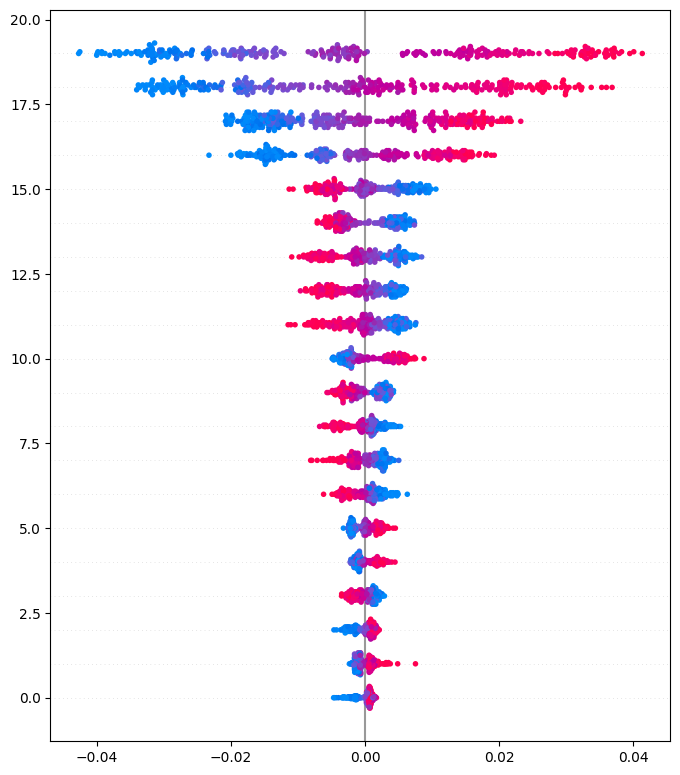

In [85]:
shap.summary_plot(shap_values, X_test)

In [86]:
import matplotlib.pyplot as plt

In [87]:
feature_importance_df.index

Index(['HeidelbergCement', 'Brenntag', 'Continental', 'Porsche',
       'Mercedes Benz', 'Volkswagen', 'Adidas', 'Bayer', 'RWE',
       'Deutsche Bank', 'Henkel', 'Deutsche Börse', 'Zalando',
       'Deutsche Telekom', 'Delivery Hero', 'Linde', 'E.ON', 'SAP', 'Vonovia',
       'Puma', 'Beiersdorf', 'MTU Aero Engines', 'DAX', 'Fresenius', 'Merck',
       'BASF', 'Siemens', 'Infineon', 'Covestro', 'Airbus', 'Deutsche Post',
       'Symrise', 'Siemens Energy', 'Qiagen', 'HelloFresh'],
      dtype='object')

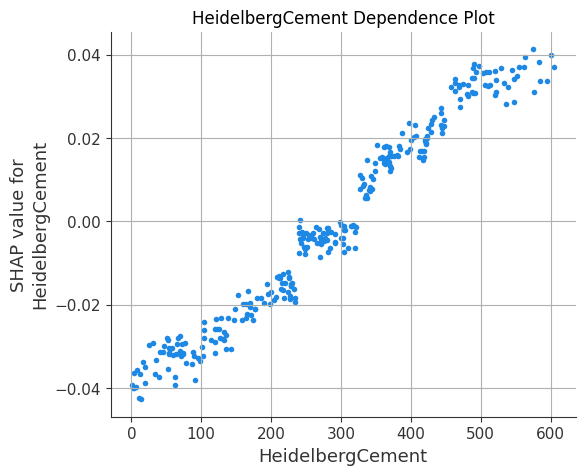

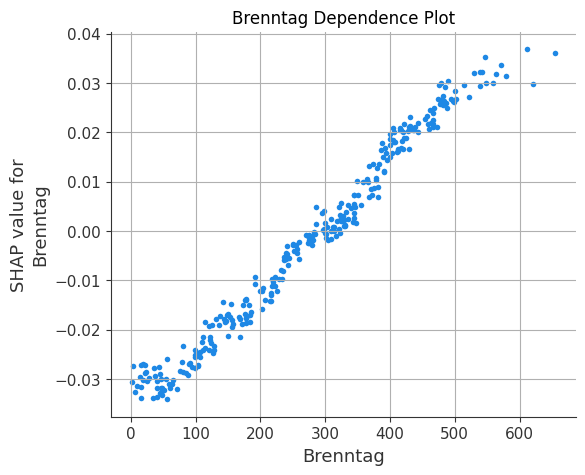

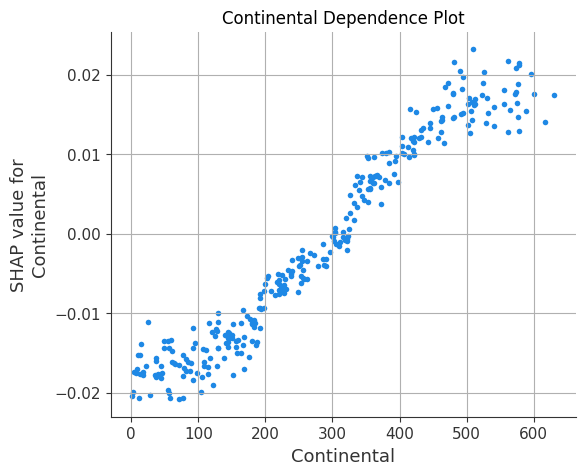

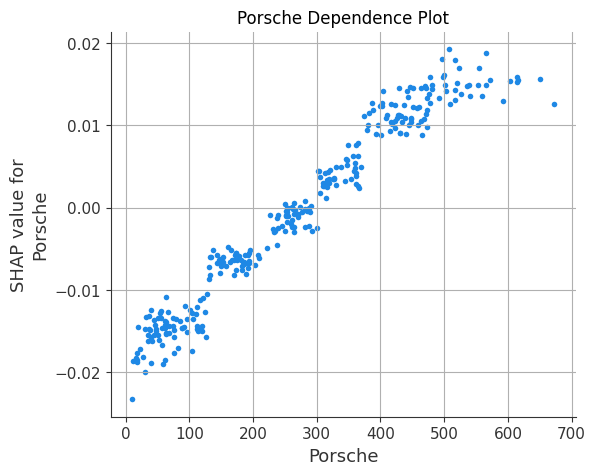

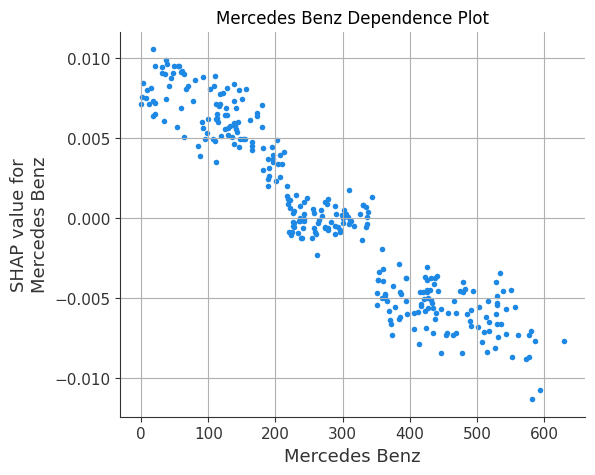

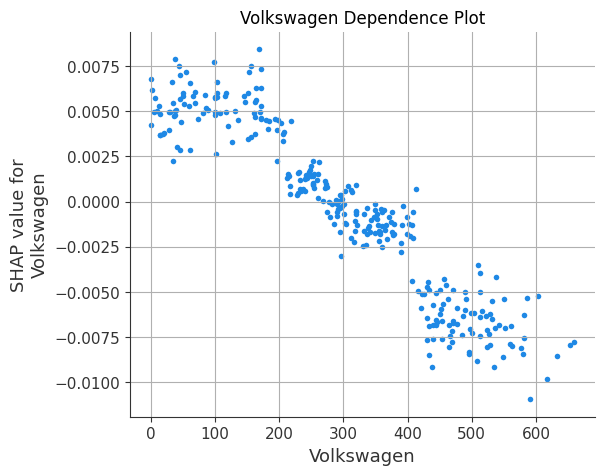

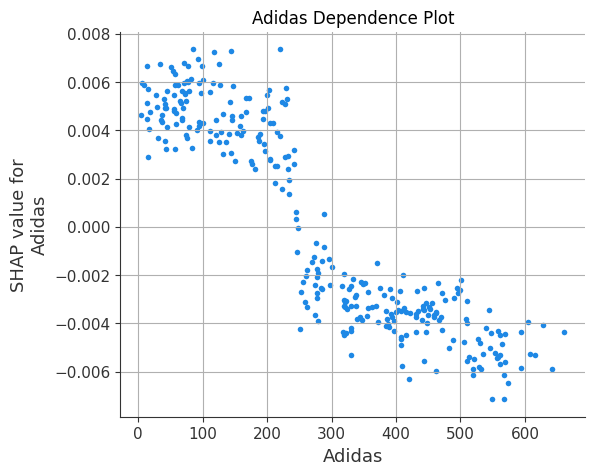

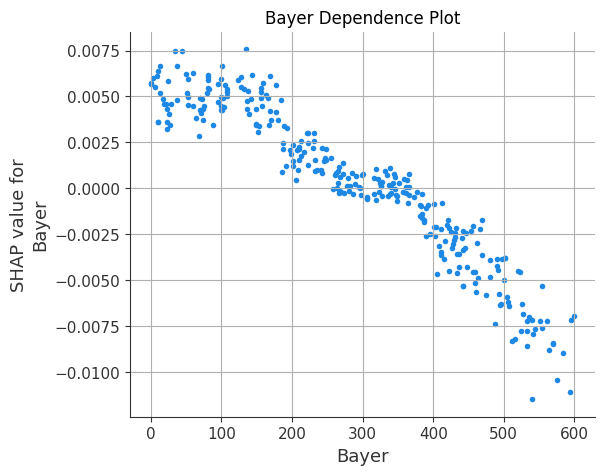

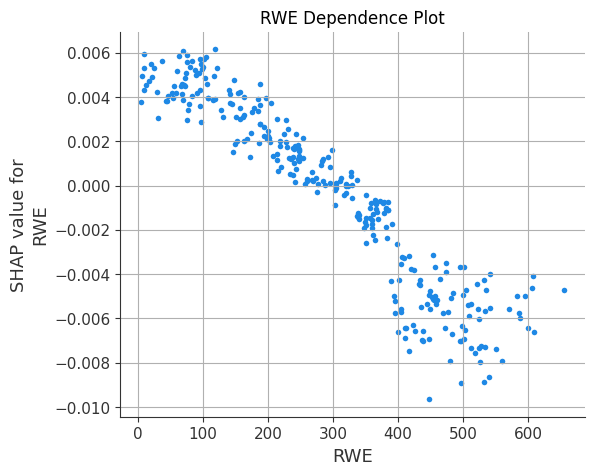

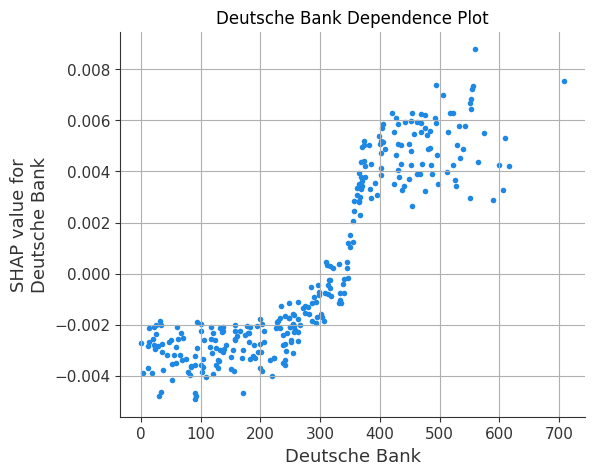

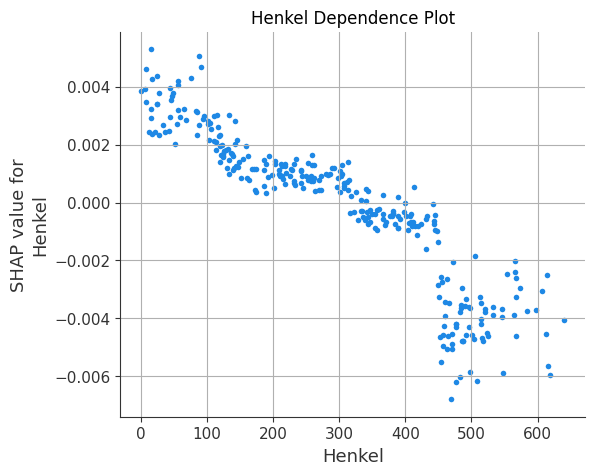

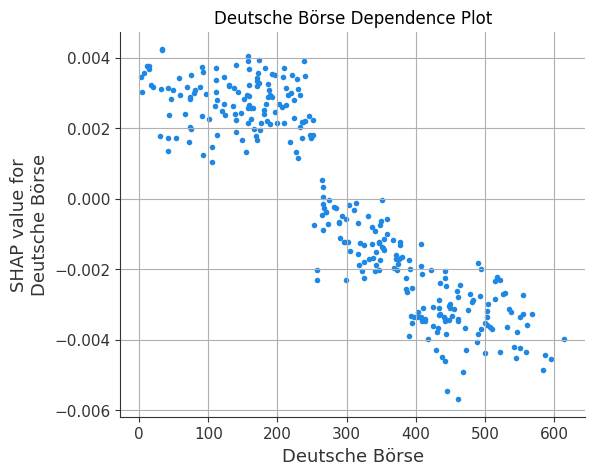

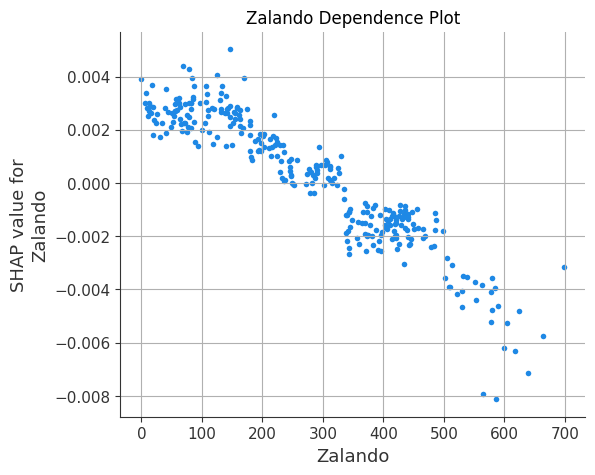

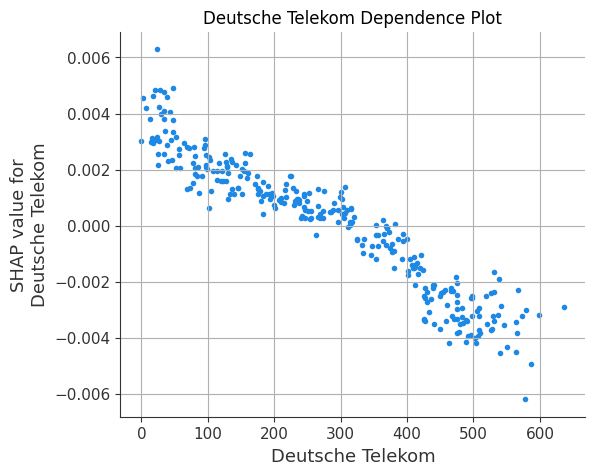

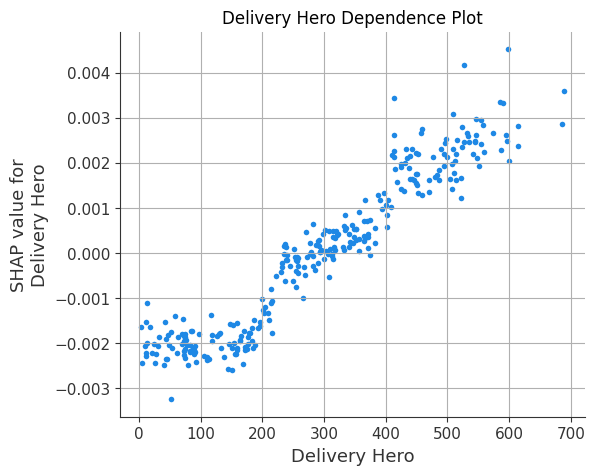

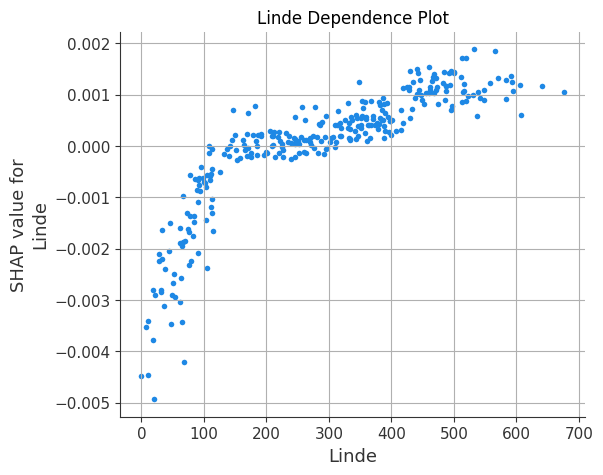

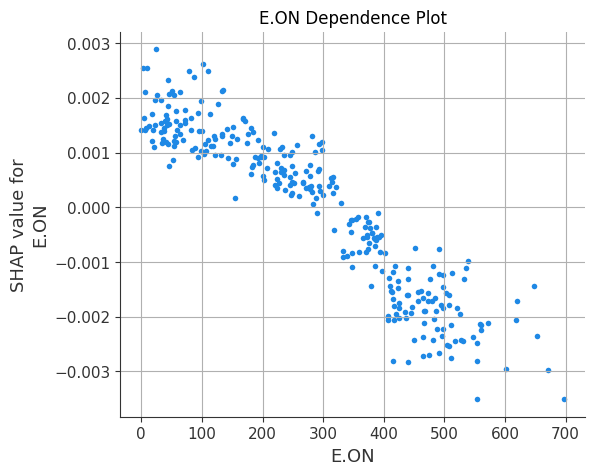

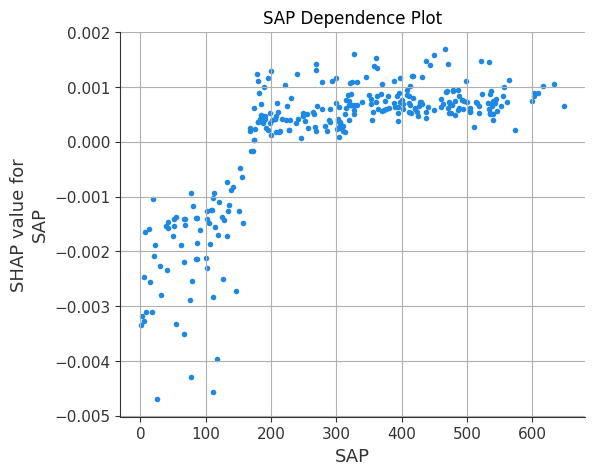

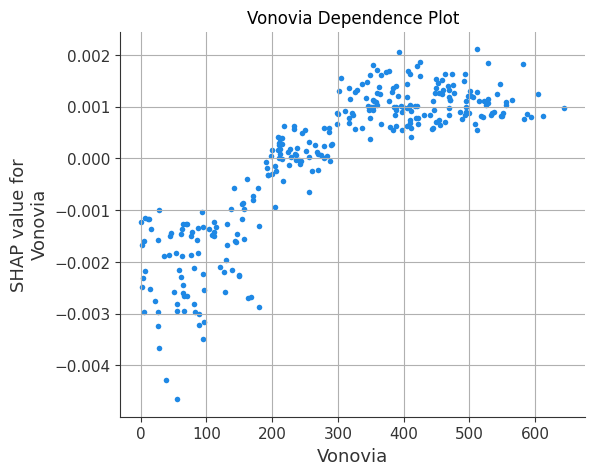

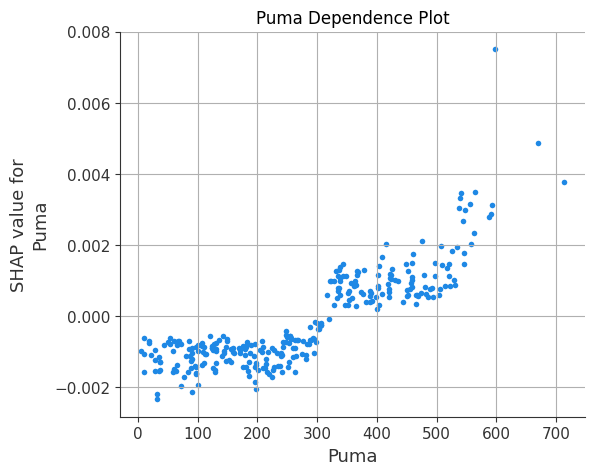

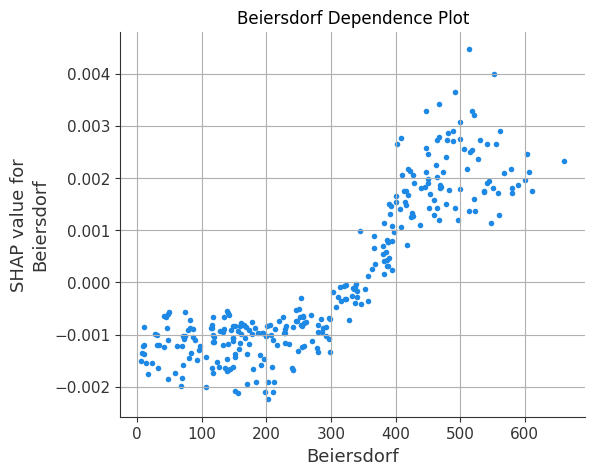

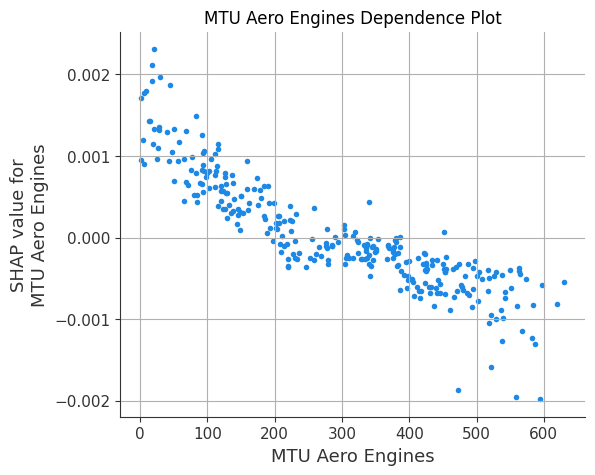

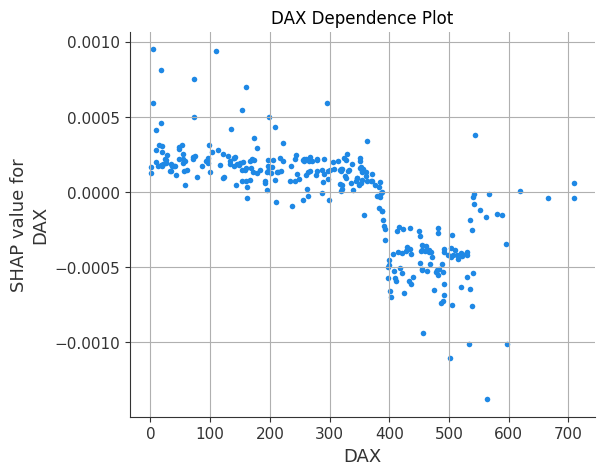

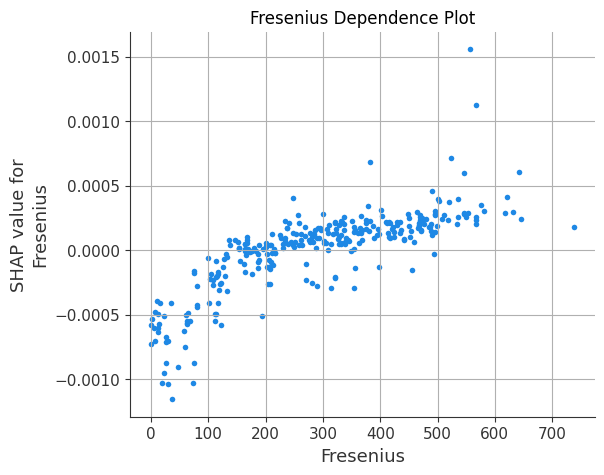

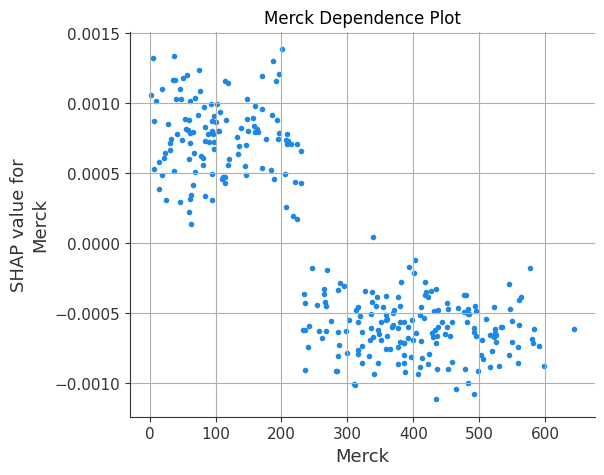

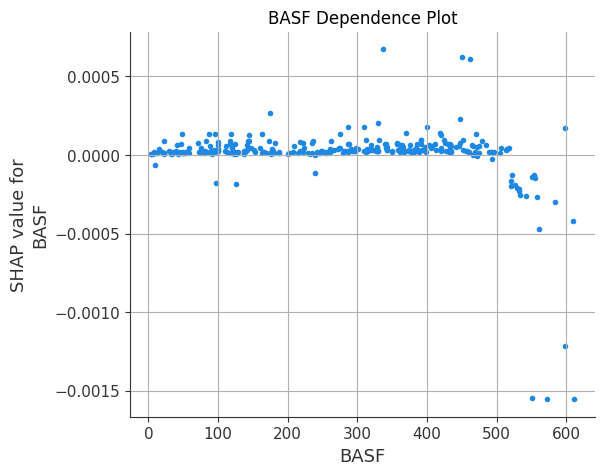

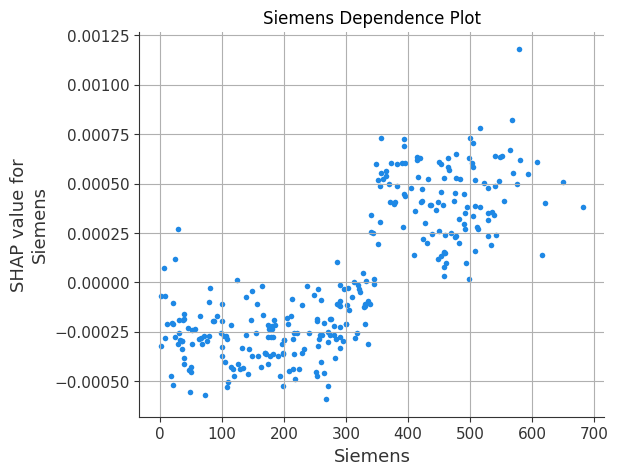

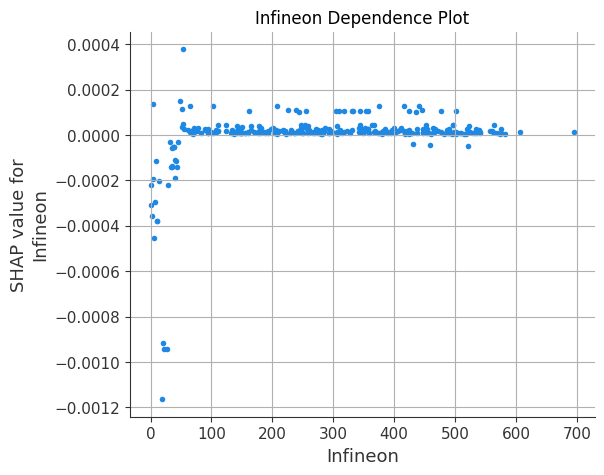

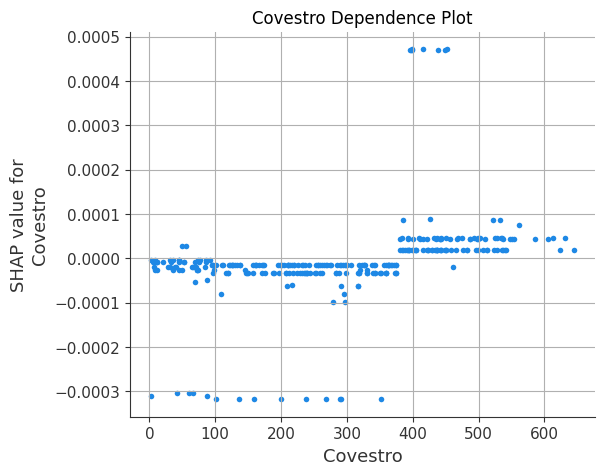

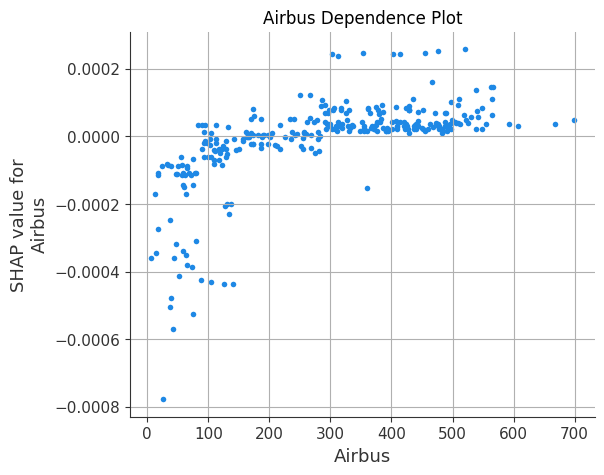

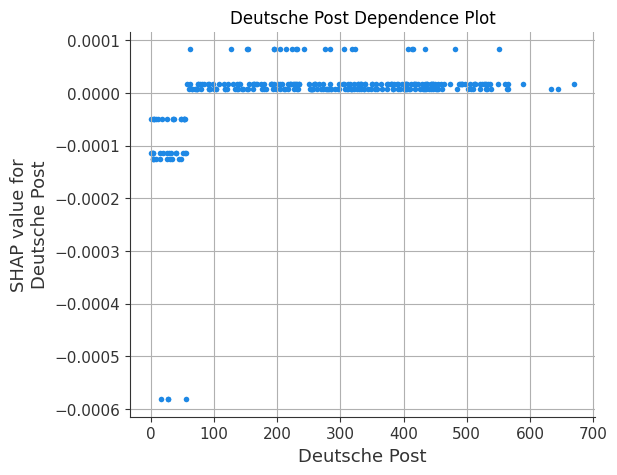

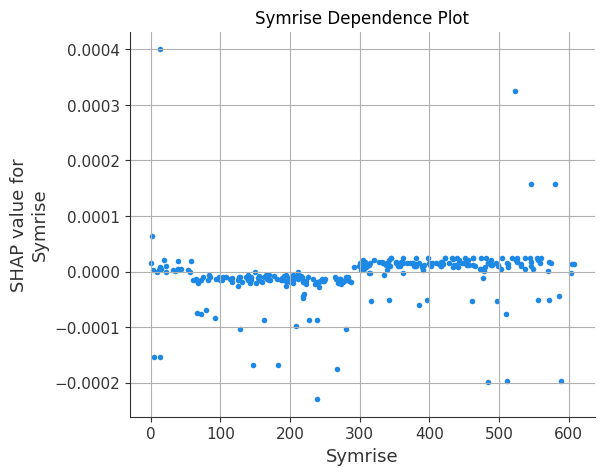

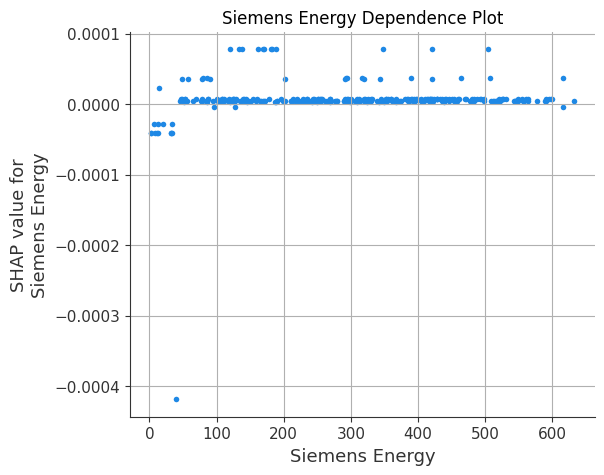

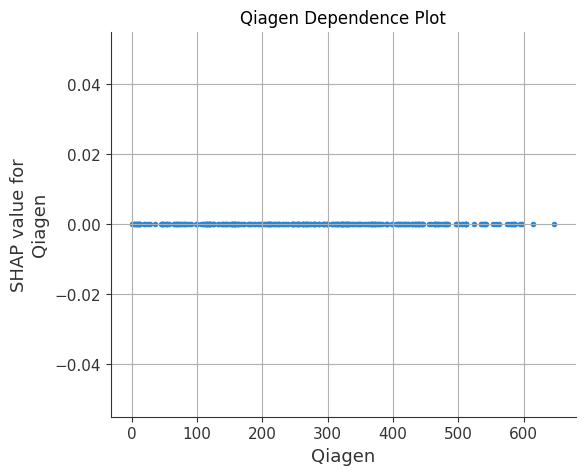

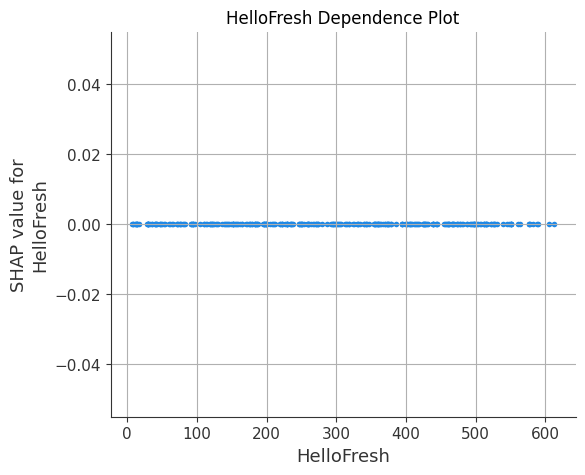

In [88]:
for stock in feature_importance_df.index:
    shap.dependence_plot(stock, shap_values, X_test, interaction_index=None, show=False)
    plt.title(stock + ' Dependence Plot')
    #plt.xlim(0, 2*average_invest)
    #plt.ylim(-0.07, 0.07)
    plt.grid('on')
    plt.show()



# To Do

In [ ]:

# reduce the number of stocks to reduce the dimensions to improve clustering!--------------------------------------ok
# cluster stock weights using cosine similarity or some other clustering algo e.g. DBScan?!-----------------------ok, erstmal,da kmeans für wenige aktien sehr gut funktioniert!
# show stock weights for each cluster--------------------------------------------------------------------------ok
# supervised learning: predict e.g. sharp ratio, or risk and return based on portfolio weights!!!!!-----------------ok
# predict on new stock weights!----------------------------------------ok
# do model explainability using shapley values!!!!

# reduce features after modeling using most important features, then redo the clustering analysis!!!!

# reduce to most important features and then use optimizer to find optimal portfolio stock weights!!! alternatively, use simple random optimization in while loop